In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# T5 PvL WSG

In [20]:
data = pd.read_csv('T5_WSG_PvL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

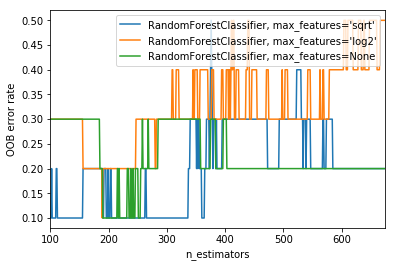

In [21]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [54]:
clf = RandomForestClassifier(n_estimators=300, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [64]:
clf_final = RandomForestClassifier(n_estimators=300, max_features='sqrt', oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [53]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.5555555555555556

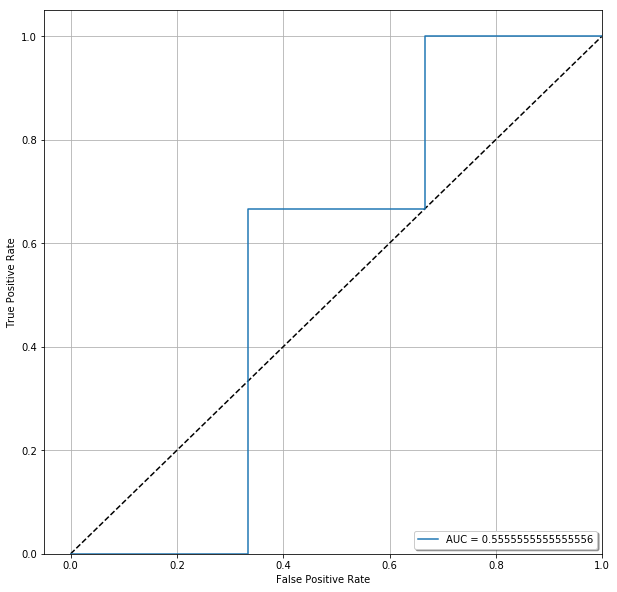

In [65]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [66]:
print(clf_final.oob_score_)

0.9


In [67]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['s_Candidatus_Arthromitus_sp._SFB-mouse',
 's_Candidatus_Arthromitus_sp._SFB-mouse-NL',
 's_Parabacteroides_goldsteinii',
 's_Pseudobutyrivibrio_ruminis',
 's_Akkermansia_muciniphila',
 's_Acetobacter_sp._SLV-7',
 's_Lactobacillus_amylolyticus',
 's_Lactobacillus_animalis',
 's_Roseburia_inulinivorans',
 's_Lactobacillus_gasseri',
 's_Thermocrinis_minervae',
 's_Vibrio_sp._2521-89',
 's_Chlamydia_caviae',
 's_Paenibacillus_sp._IHB_B_3084',
 's_Entomoplasma_freundtii',
 's_Lactobacillus_acidophilus',
 's_Lactobacillus_reuteri',
 's_Bifidobacterium_pseudolongum',
 's_Agathobacter_ruminis',
 's_Borrelia_anserina']

In [68]:
for i in feats.values:
    print(i)

0.1903703703703704
0.16174603174603172
0.07888888888888888
0.07314814814814814
0.06843253968253968
0.037837301587301586
0.034894179894179894
0.03372354497354498
0.03221560846560847
0.028485449735449735
0.027361111111111107
0.024915343915343918
0.023623015873015872
0.019993386243386244
0.019563492063492064
0.018624338624338623
0.01659920634920635
0.016415343915343918
0.015740740740740743
0.01444444444444444


# T5 PvL BA

In [71]:
data = pd.read_csv('T5_BA_PvL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=16)

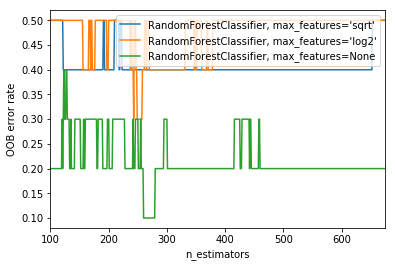

In [72]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [73]:
clf = RandomForestClassifier(n_estimators=500, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.8


In [81]:
clf_final = RandomForestClassifier(n_estimators=500, max_features=None, oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.5


In [82]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6666666666666667

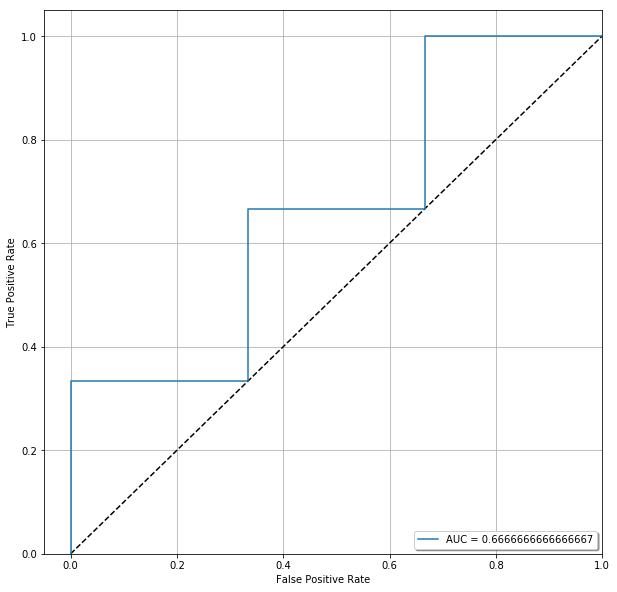

In [83]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [84]:
print(clf_final.oob_score_)

0.8


In [85]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['β-Hyodeoxycholic acid.10',
 'β-Hyodeoxycholic acid.7',
 'β-Hyodeoxycholic acid.19',
 'α-Hyodeoxycholic acid methyl ester .7',
 'β-Hyodeoxycholic acid',
 'β-Hyodeoxycholic acid.16',
 'β-Hyodeoxycholic acid.2',
 'β-Hyodeoxycholic acid.13',
 'β-Hyodeoxycholic acid.14',
 'α-Hyodeoxycholic acid methyl ester .6',
 'α-Hyodeoxycholic acid methyl ester .1',
 'α-Hyodeoxycholic acid methyl ester .2',
 'β-Hyodeoxycholic acid.20',
 'α-Hyodeoxycholic acid methyl ester .4',
 'α-Hyodeoxycholic acid methyl ester .5',
 'α-Hyodeoxycholic acid methyl ester .3',
 'β-Hyodeoxycholic acid.1',
 'β-Hyodeoxycholic acid.6',
 'β-Hyodeoxycholic acid.3',
 'β-Hyodeoxycholic acid.4']

In [86]:
for i in feats.values:
    print(i)

0.536436507936508
0.10521666666666661
0.09954761904761904
0.07596031746031746
0.06608333333333334
0.053357142857142846
0.02752539682539683
0.014055555555555557
0.009380952380952384
0.005603174603174603
0.004
0.0028333333333333335
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# T5 PvL Known

In [91]:
data = pd.read_csv('T5_Known_PvL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=16)

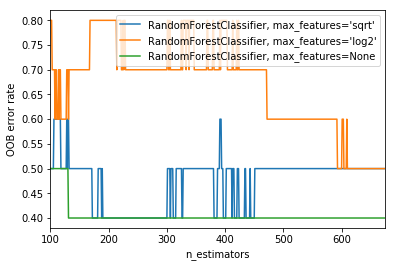

In [92]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [93]:
clf = RandomForestClassifier(n_estimators=200, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.6


In [106]:
clf_final = RandomForestClassifier(n_estimators=200, max_features=None, oob_score=True, random_state=16)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.5


In [107]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.4444444444444445

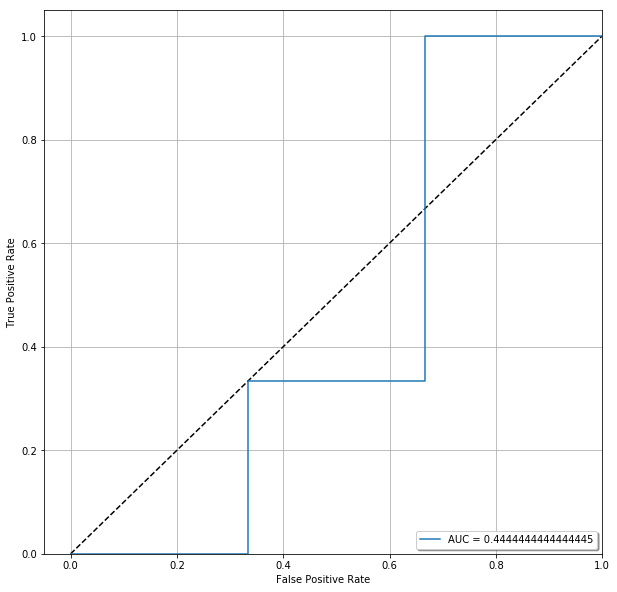

In [108]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [109]:
print(clf_final.oob_score_)

0.6


In [110]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['Oleanolic acid',
 'Sumaresinolic acid',
 'Phytomonic acid',
 'Urobilin',
 'phosphocholine (NIST14)',
 'Ricinoleic Acid methyl ester',
 'Oleanolic acid methyl ester',
 '9(10)-EpOME (NIST14)',
 'Urobilin (NIST14)',
 'phosphoethanolamine (NIST14)',
 'phosphoethanolamine (NIST14).1',
 'Oleoyl L-carnitine (NIST14)',
 'Urobilin (NIST14).2',
 'Oleic acid methyl ester',
 'Phe-Pro (NIST14)',
 'Phenol',
 'Urobilin (NIST14).1',
 'Urobilin (NIST14).3',
 'Urobilin (NIST14).4',
 'Tris(2-butoxyethyl) phosphate (NIST14)']

In [111]:
for i in feats.values:
    print(i)

0.45968253968253975
0.07319940476190476
0.07256646825396826
0.07222222222222222
0.0641577380952381
0.05071428571428571
0.046757936507936505
0.04225099206349206
0.030079365079365084
0.021349206349206343
0.020952380952380955
0.011101190476190476
0.008125
0.007678571428571429
0.007555555555555555
0.006666666666666667
0.00494047619047619
0.0
0.0
0.0


# T5 LvCoL WSG

In [114]:
data = pd.read_csv('T5_WSG_LvCoL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

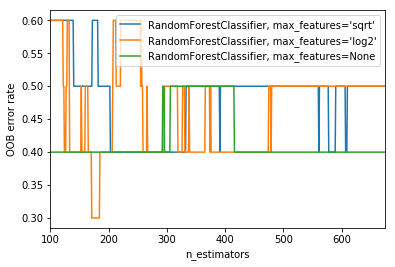

In [115]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [118]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=41)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [120]:
clf_final = RandomForestClassifier(n_estimators=100, max_features=None, oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [121]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.888888888888889

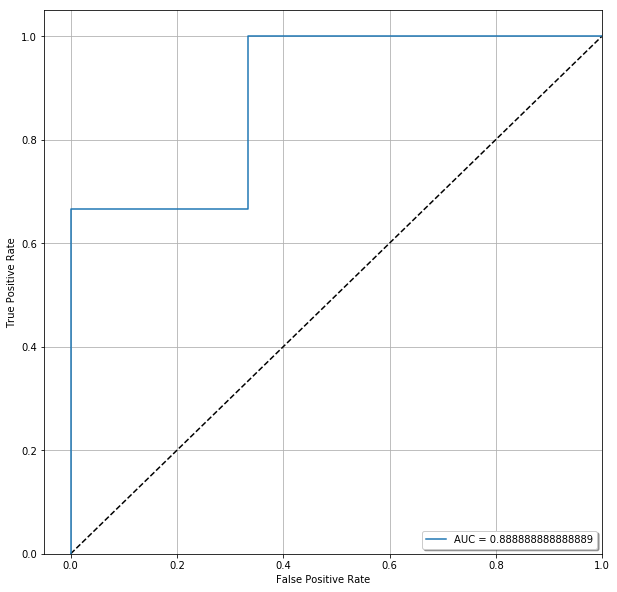

In [122]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [123]:
print(clf_final.oob_score_)

0.6


In [124]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['s_Chlamydia_caviae',
 's_Bifidobacterium_pseudolongum',
 's_Lactobacillus_gasseri',
 's_Vibrio_sp._2521-89',
 's_Entomoplasma_freundtii',
 's_Thermocrinis_minervae',
 's_Candidatus_Arthromitus_sp._SFB-mouse',
 's_Corynebacterium_uterequi',
 's_Borrelia_anserina',
 's_Faecalibaculum_rodentium',
 's_Bacteroides_vulgatus',
 's_Lactobacillus_johnsonii',
 's_Paenibacillus_sp._IHB_B_3084',
 's_Candidatus_Arthromitus_sp._SFB-mouse-NL',
 's_Parabacteroides_goldsteinii',
 's_Lachnospiraceae_bacterium_14-2',
 's_Akkermansia_muciniphila',
 's_Lactobacillus_reuteri',
 's_Lactobacillus_animalis',
 's_Lactobacillus_amylolyticus']

In [125]:
for i in feats.values:
    print(i)

0.18976190476190474
0.13666666666666666
0.07607142857142858
0.06642857142857142
0.06
0.057023809523809525
0.05
0.049523809523809526
0.04
0.03
0.03
0.029761904761904764
0.02666666666666667
0.026666666666666665
0.020238095238095236
0.016666666666666666
0.01380952380952381
0.013571428571428573
0.013333333333333332
0.01


# T5 LvCoL BA

In [126]:
data = pd.read_csv('T5_BA_LvCoL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

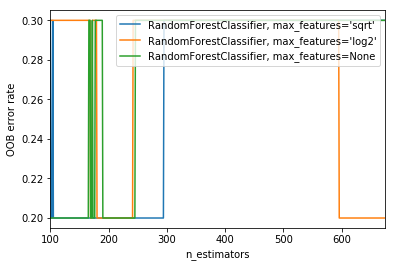

In [127]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [129]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [140]:
clf_final = RandomForestClassifier(n_estimators=100, max_features=None, oob_score=True, random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [141]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.4444444444444444

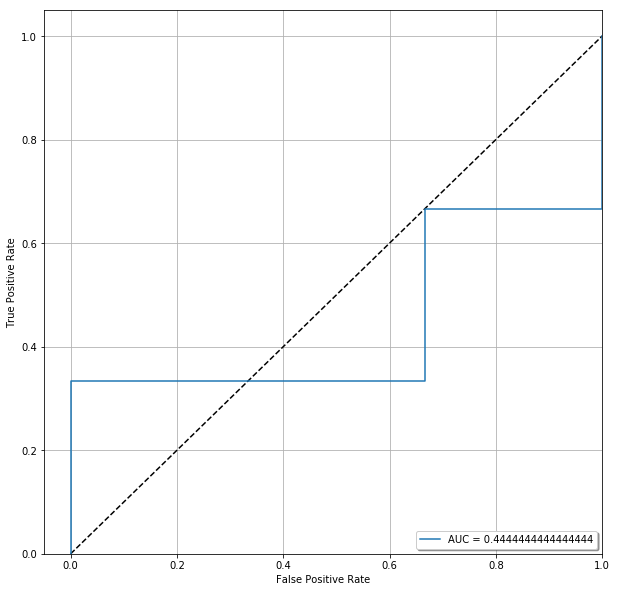

In [142]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [143]:
print(clf_final.oob_score_)

0.8


In [144]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['β-Hyodeoxycholic acid.7',
 'β-Hyodeoxycholic acid.13',
 'α-Hyodeoxycholic acid methyl ester .7',
 'β-Hyodeoxycholic acid.3',
 'β-Hyodeoxycholic acid.2',
 'α-Hyodeoxycholic acid methyl ester ',
 'α-Hyodeoxycholic acid methyl ester .1',
 'β-Hyodeoxycholic acid.14',
 'β-Hyodeoxycholic acid.6',
 'β-Hyodeoxycholic acid.15',
 'β-Hyodeoxycholic acid.10',
 'β-Hyodeoxycholic acid.11',
 'β-Hyodeoxycholic acid',
 'β-Hyodeoxycholic acid.18',
 'α-Hyodeoxycholic acid methyl ester .2',
 'α-Hyodeoxycholic acid methyl ester .3',
 'α-Hyodeoxycholic acid methyl ester .4',
 'α-Hyodeoxycholic acid methyl ester .5',
 'α-Hyodeoxycholic acid methyl ester .6',
 'β-Hyodeoxycholic acid.17']

In [145]:
for i in feats.values:
    print(i)

0.3607738095238095
0.34303571428571433
0.21173015873015874
0.028190476190476193
0.017916666666666668
0.011111111111111112
0.009246031746031745
0.007499999999999999
0.004166666666666666
0.00375
0.002579365079365079
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# T5 LvCoL Known

In [150]:
data = pd.read_csv('T5_Known_LvCoL.csv', index_col = 0)
data = data.T
y = data.iloc[:,0]
x = data.iloc[:,1:30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

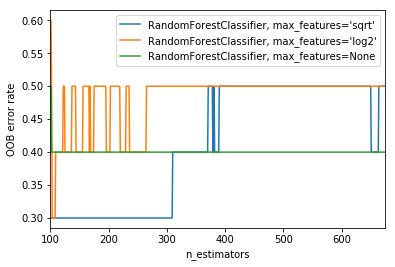

In [151]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [152]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [159]:
clf_final = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True,  random_state=42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.16666666666666666


In [161]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.0

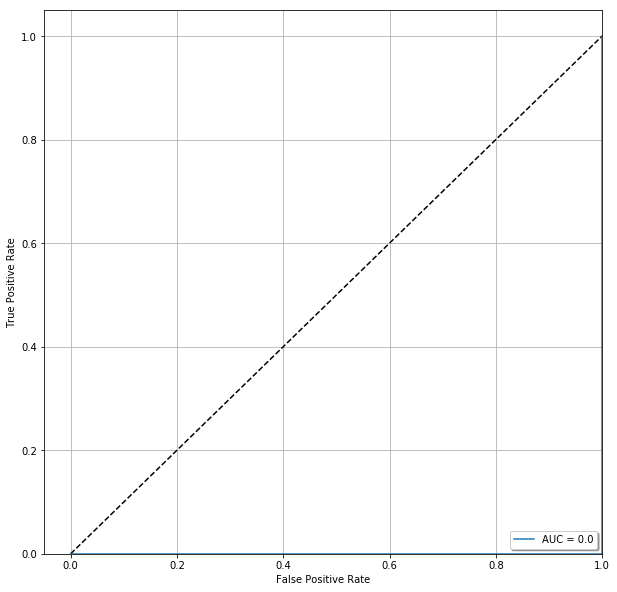

In [162]:
# get roc/auc info
Y_score = clf_final.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [163]:
print(clf_final.oob_score_)

0.7


In [164]:
features = []
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feats = feature_importance[0:20]
for i in feats.index:
    features.append(x.iloc[:,i].name)
features

['Oleanolic acid methyl ester',
 'phosphocholine (NIST14)',
 'phosphoethanolamine (NIST14)',
 'PC(O-16:1/0:0); [M+H]+ C24H51N1O6P1',
 '9(10)-EpOME (NIST14)',
 'Phytomonic acid',
 'Phenol',
 'Oleic acid methyl ester',
 'Urobilin',
 'Ricinoleic Acid methyl ester',
 'Sumaresinolic acid',
 'Urobilin (NIST14).2',
 'Urobilin (NIST14)',
 'Urobilin (NIST14).1',
 'phosphoethanolamine (NIST14).1',
 'Urobilin (NIST14).3',
 'phosphocholine (NIST14).2',
 '4-dihydroxyheptadec-16-en-2-yl acetate',
 'phosphocholine (NIST14).1',
 'Oleanolic acid']

In [165]:
for i in feats.values:
    print(i)

0.1824642857142857
0.16724064625850343
0.09779431216931216
0.08264219576719578
0.06891269841269841
0.06822874149659865
0.05268386243386243
0.04708333333333333
0.039697845804988655
0.038571428571428576
0.032278439153439156
0.0314186507936508
0.02951388888888889
0.027728174603174605
0.013167989417989419
0.011459750566893422
0.005833333333333333
0.00328042328042328
0.0
0.0
